# Exam for Machine Learning Python Lab
Uploading and reading a small portion of Online-Retail-France.xlsx with pandas

In [1]:
# Imports
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

# Variables
file_name = 'Online-Retail-France.xlsx'
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

df = pd.read_excel(file_name)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0


## Showing the number of different Descriprion Values registered 

In [2]:
print(df.groupby('Description').nunique().count)

<bound method DataFrame.count of                                   InvoiceNo  StockCode  Quantity  InvoiceDate  \
Description                                                                     
 50'S CHRISTMAS GIFT BAG LARGE            1          1         1            1   
 DOLLY GIRL BEAKER                        9          1         2            9   
 I LOVE LONDON MINI BACKPACK              5          1         2            5   
 NINE DRAWER OFFICE TIDY                  1          1         1            1   
 SET 2 TEA TOWELS I LOVE LONDON           7          1         4            7   
...                                     ...        ...       ...          ...   
ZINC FOLKART SLEIGH BELLS                 8          1         3            8   
ZINC HERB GARDEN CONTAINER                1          1         1            1   
ZINC METAL HEART DECORATION               4          1         2            4   
ZINC T-LIGHT HOLDER STAR LARGE            1          1         1            

## Showing number of different Description Values after cleaning leading and spaces

In [3]:
print(df['Description'].str.strip().nunique())

1564


## Removing extra rows with no value in invoiceNo column, then show every changes



In [4]:
dfclean = (df[df['InvoiceNo'].notnull()])
print(dfclean)
print ("number of different descriptions: {}".format(dfclean['Description'].str.strip().nunique()))


     InvoiceNo StockCode                      Description  Quantity  \
0       536370     22728        ALARM CLOCK BAKELIKE PINK        24   
1       536370     22727        ALARM CLOCK BAKELIKE RED         24   
2       536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
3       536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
4       536370     21883                 STARS GIFT TAPE         24   
...        ...       ...                              ...       ...   
8551    581587     23256      CHILDRENS CUTLERY SPACEBOY          4   
8552    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
8553    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
8554    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
8556    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

              InvoiceDate  UnitPrice  CustomerID  
0     2010-12-01 08:45:00       3.75     12583.0  
1     2010-12-01 08:45:00       3.75     1258

# Some InvoiceNo start with a C. They are "credit transactions" and must be removed. Inspect the effect of this cleaning.

In [5]:
dfclean= dfclean[dfclean['InvoiceNo'].astype(str).str.startswith('C')==False]
print (dfclean)

print ("number of different descriptions: {}".format(dfclean['Description'].str.strip().nunique()))

     InvoiceNo StockCode                      Description  Quantity  \
0       536370     22728        ALARM CLOCK BAKELIKE PINK        24   
1       536370     22727        ALARM CLOCK BAKELIKE RED         24   
2       536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
3       536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
4       536370     21883                 STARS GIFT TAPE         24   
...        ...       ...                              ...       ...   
8551    581587     23256      CHILDRENS CUTLERY SPACEBOY          4   
8552    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
8553    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
8554    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
8556    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

              InvoiceDate  UnitPrice  CustomerID  
0     2010-12-01 08:45:00       3.75     12583.0  
1     2010-12-01 08:45:00       3.75     1258

#  Several transactions include the item POSTAGE, which represents the mailing expenses. In this analysis we are not interested in it, therefore the rows with POSTAGE will be removed. Inspect the effect of this cleaning.

In [6]:
dfclean= dfclean[dfclean['Description'].astype(str).str.startswith('POSTAGE')==False]
print (dfclean)

print ("number of different descriptions: {}".format(dfclean['Description'].str.strip().nunique()))

     InvoiceNo StockCode                      Description  Quantity  \
0       536370     22728        ALARM CLOCK BAKELIKE PINK        24   
1       536370     22727        ALARM CLOCK BAKELIKE RED         24   
2       536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
3       536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
4       536370     21883                 STARS GIFT TAPE         24   
...        ...       ...                              ...       ...   
8551    581587     23256      CHILDRENS CUTLERY SPACEBOY          4   
8552    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
8553    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
8554    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
8556    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

              InvoiceDate  UnitPrice  CustomerID  
0     2010-12-01 08:45:00       3.75     12583.0  
1     2010-12-01 08:45:00       3.75     1258

# After the cleanup, we need to consolidate the items into one transaction per row with products one–hot–encoded. To do so, group by InvoiceNo and Description computing a sum on Quantity, use the Pandas unstack function to move the items from rows to columns, reset the index, fill the missing with zero, store the result in a new dataframe basket and inspect it

In [7]:
#transactdf = dfclean.drop('StockCode', axis=1)
basket = dfclean.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
print(basket)
basket.describe(include='all')

Description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
InvoiceNo                                                         
536370                                  0.0                 0.0   
536852                                  0.0                 0.0   
536974                                  0.0                 0.0   
537065                                  0.0                 0.0   
537463                                  0.0                 0.0   
...                                     ...                 ...   
580986                                  0.0                 0.0   
581001                                  0.0                 0.0   
581171                                  0.0                 0.0   
581279                                  0.0                 0.0   
581587                                  0.0                 0.0   

Description   I LOVE LONDON MINI BACKPACK   NINE DRAWER OFFICE TIDY  \
InvoiceNo                                                

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,...,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.031008,0.310078,0.049096,0.005168,0.341085,0.222222,0.015504,0.868217,0.310078,0.005168,...,0.193798,0.023256,0.010336,0.002584,0.082687,0.279070,0.012920,0.186047,0.031008,0.062016
std,0.609994,2.092913,0.432091,0.101666,3.943571,1.562919,0.304997,5.109242,2.474110,0.101666,...,2.195417,0.340644,0.203331,0.050833,1.626651,2.348994,0.254164,1.922464,0.609994,0.861544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,4.000000,2.000000,72.000000,24.000000,6.000000,48.000000,20.000000,2.000000,...,25.000000,6.000000,4.000000,1.000000,32.000000,36.000000,5.000000,24.000000,12.000000,12.000000


# We need to convert to True the positive values and to False the non–positive values. Inspect the result of this transformation and verify the correctness.

In [8]:
def encode_unit(x):
    if x>0: return True
    else: return False
basket_sets=basket.map(encode_unit)
basket_sets.describe()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,387,387,387,387,387,387,387,387,387,387,...,387,387,387,387,387,387,387,387,387,387
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,386,378,382,386,380,371,386,375,381,386,...,384,385,386,386,386,380,386,383,386,385


# Find the maximum value of min_support such that the number of rules generated from the frequent itemsets with lift not less than 1 is at least 20. Show the value obtained for min_support and show the rules. 
## Hint: use a loop with an initial value min_support=1 and decrease it in steps -0.01
## Hint: In apriori set the parameter use_colnames=True
#  Generate the rules with association_rules using metric=lift and min_threshold=1

In [9]:
min_support=1
step=0.01
min_rules = 20

while True:
    frequent= apriori(basket_sets, min_support=min_support, use_colnames=True )
    if frequent.shape[0]>0:
        rules = association_rules(frequent, metric='lift', min_threshold=1)
    if frequent.shape[0] >0 and rules.shape[0]>=min_rules:
        break
    else:
        min_support -= step
        
print (frequent)
print("'min_support'={:4.2f}, 'metric'={}, 'min_threshold'={}, number of frequent itemsets={}, number of rules={}"\
      .format(min_support, 'lift', 1, frequent.shape[0], rules.shape[0]))

     support                                           itemsets
0   0.098191                       (ALARM CLOCK BAKELIKE GREEN)
1   0.103359                        (ALARM CLOCK BAKELIKE PINK)
2   0.095607                        (ALARM CLOCK BAKELIKE RED )
3   0.082687                    (BAKING SET 9 PIECE RETROSPOT )
4   0.100775                             (DOLLY GIRL LUNCH BOX)
5   0.098191                          (JUMBO BAG RED RETROSPOT)
6   0.126615                           (LUNCH BAG APPLE DESIGN)
7   0.085271                      (LUNCH BAG DOLLY GIRL DESIGN)
8   0.155039                          (LUNCH BAG RED RETROSPOT)
9   0.121447                       (LUNCH BAG SPACEBOY DESIGN )
10  0.118863                               (LUNCH BAG WOODLAND)
11  0.144703                (LUNCH BOX WITH CUTLERY RETROSPOT )
12  0.105943                          (MINI PAINT SET VINTAGE )
13  0.103359                  (PACK OF 72 RETROSPOT CAKE CASES)
14  0.082687                          (P

# Scatter–plot some information about the rules We will sort on descending lift and confidence

In [14]:
sorted_rules=rules.sort_values(by=['lift','confidence'],ascending=False).reset_index(drop=True)
sorted_rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.095607,0.098191,0.080103,0.837838,8.532717,1.0,0.070716,5.561154,0.976129,0.704545,0.820181,0.826814
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.098191,0.095607,0.080103,0.815789,8.532717,1.0,0.070716,4.909561,0.978926,0.704545,0.796316,0.826814
2,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER PLATES),0.103359,0.129199,0.100775,0.975000,7.546500,1.0,0.087421,34.832041,0.967487,0.764706,0.971291,0.877500
3,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",0.129199,0.103359,0.100775,0.780000,7.546500,1.0,0.087421,4.075640,0.996196,0.764706,0.754640,0.877500
4,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER CUPS),0.103359,0.139535,0.100775,0.975000,6.987500,1.0,0.086353,34.418605,0.955664,0.709091,0.970946,0.848611


<Axes: title={'center': 'Association Rules'}, xlabel='lift', ylabel='confidence'>

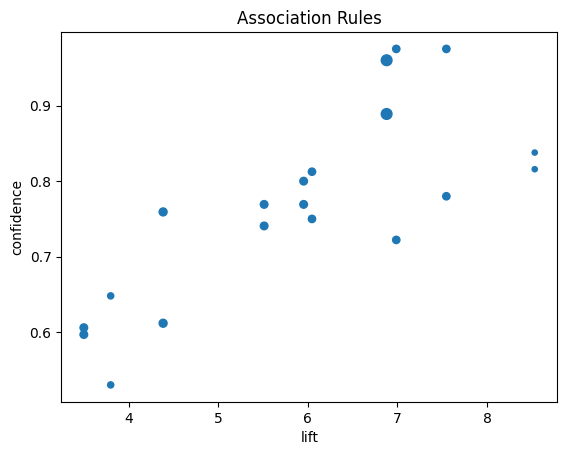

In [17]:

sorted_rules.plot.scatter(x='lift',y='confidence',s=3**(sorted_rules['support']*30),title='Association Rules')